# Principal Component Analysis with Cancer Data

In [104]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [182]:
# reading the CSV file into pandas dataframe
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv") 

In [131]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [49]:
# Check top few records to get a feel of the data structure
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [50]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [51]:
# All columns are integer except for Bare Nuclei, lets see what  this contain

In [56]:
cancer_df.groupby('Bare Nuclei').count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
Bare Nuclei,,,,,,,,,,
1,402,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21,21


In [9]:
#There are missing values in Bare Nuclei, so there might be more, also

In [55]:
cancer_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [53]:
# from the above there are outliers in the data

In [57]:
cancer_df.shape

(699, 11)

In [58]:
if cancer_df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


In [59]:
columns=cancer_df.columns

In [60]:
print(columns)

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')


In [84]:
cancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
# baren nuclei has ? which needs to be imputed with mode instead of mean

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [91]:
np.where(cancer_df['Bare Nuclei']=='?')

(array([ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
        321, 411, 617], dtype=int64),)

In [92]:
#imputing median value

In [183]:
colswithQ=[]
i=0
for col in columns:
    if cancer_df[col].loc[cancer_df[col]=='?'].count()>0:
        temp=cancer_df[col].loc[cancer_df[col]!='?']
        tempmedian=temp.astype(str).astype(int).median()
        cancer_df[col]=cancer_df[col].replace('?',tempmedian).astype(int)
        cancer_df[col].head()
        colswithQ.append(col)

C:\Users\Radhika\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [133]:
cancer_df['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [ ]:
# value of ? is removed

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

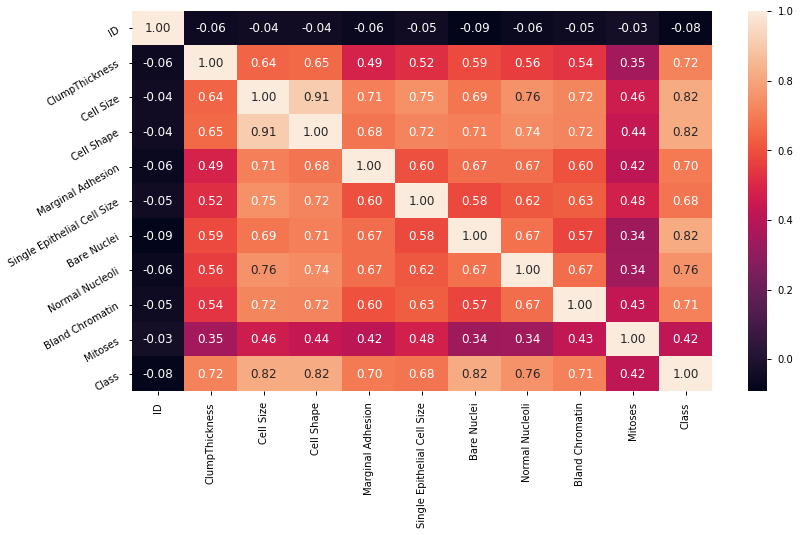

In [95]:
import seaborn as sns
corr = cancer_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Inference: Correlation found between cell size and cell shape of 0.91 and with respect to class variable, major correlation found between cell size, cell shape, bare nuclei

In [ ]:
Cell Shape

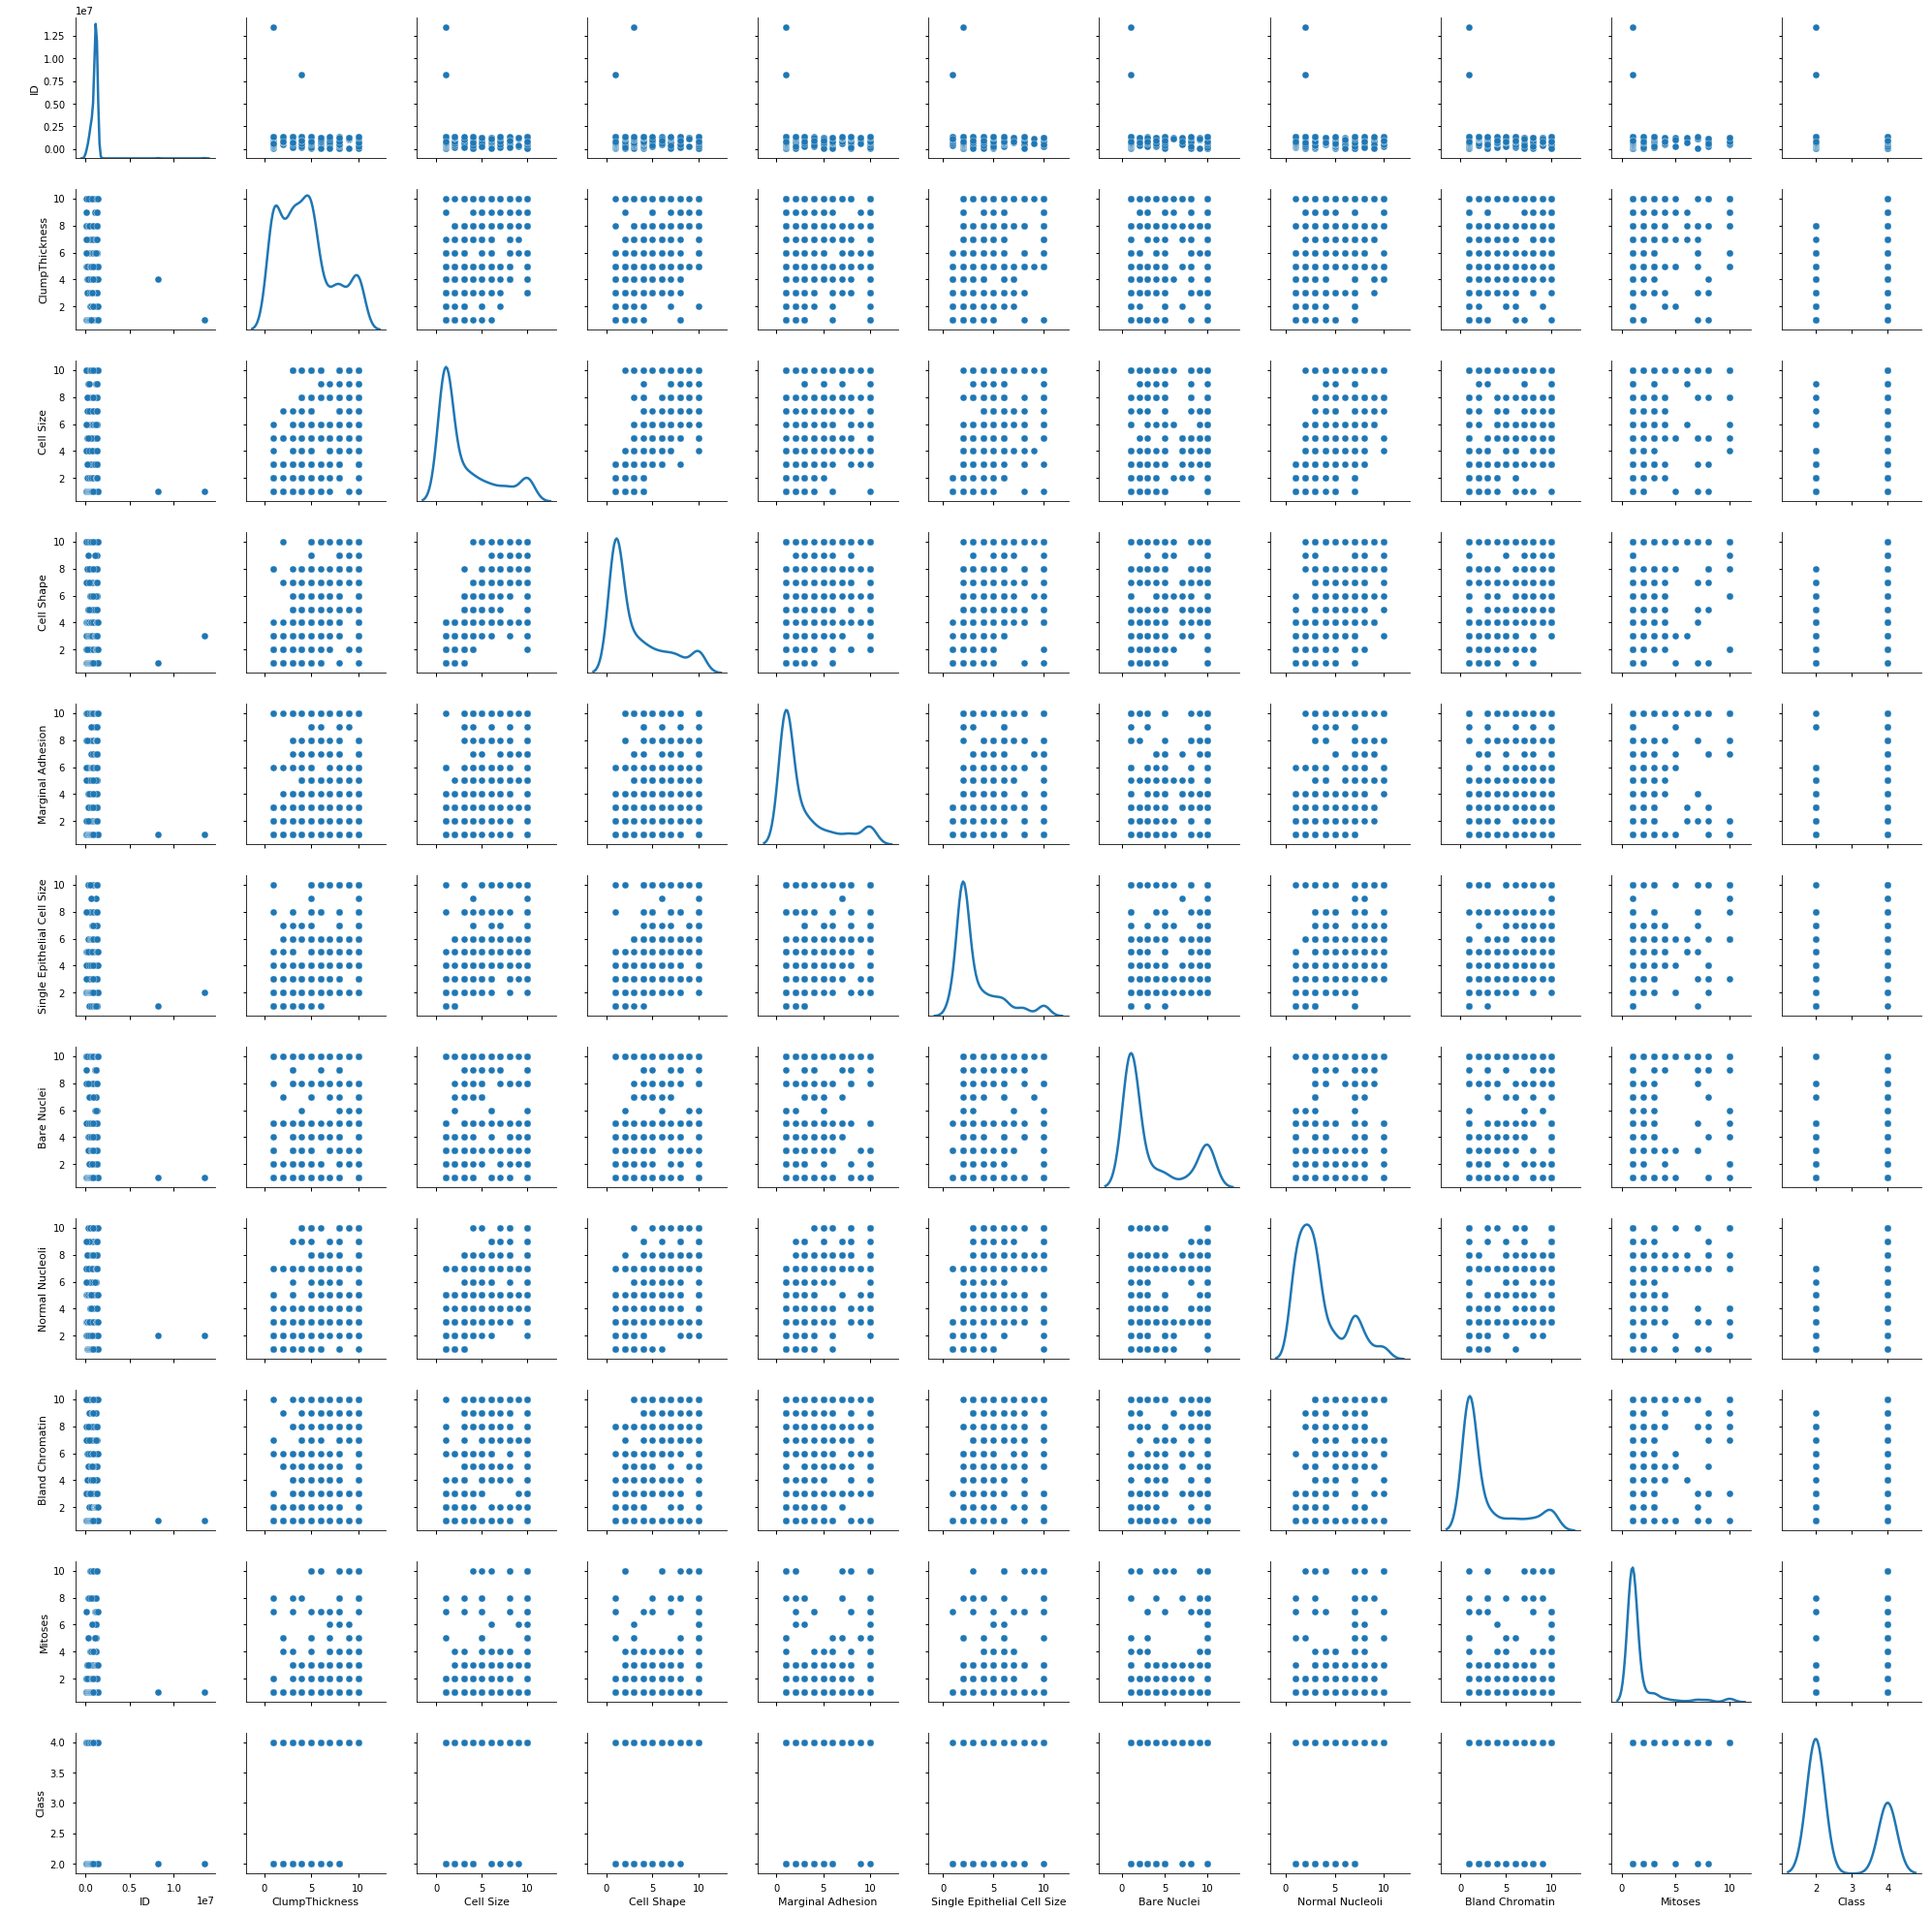

In [96]:
sns.pairplot(cancer_df, diag_kind='kde')   # to plot density curve instead of histogram

In [97]:
columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

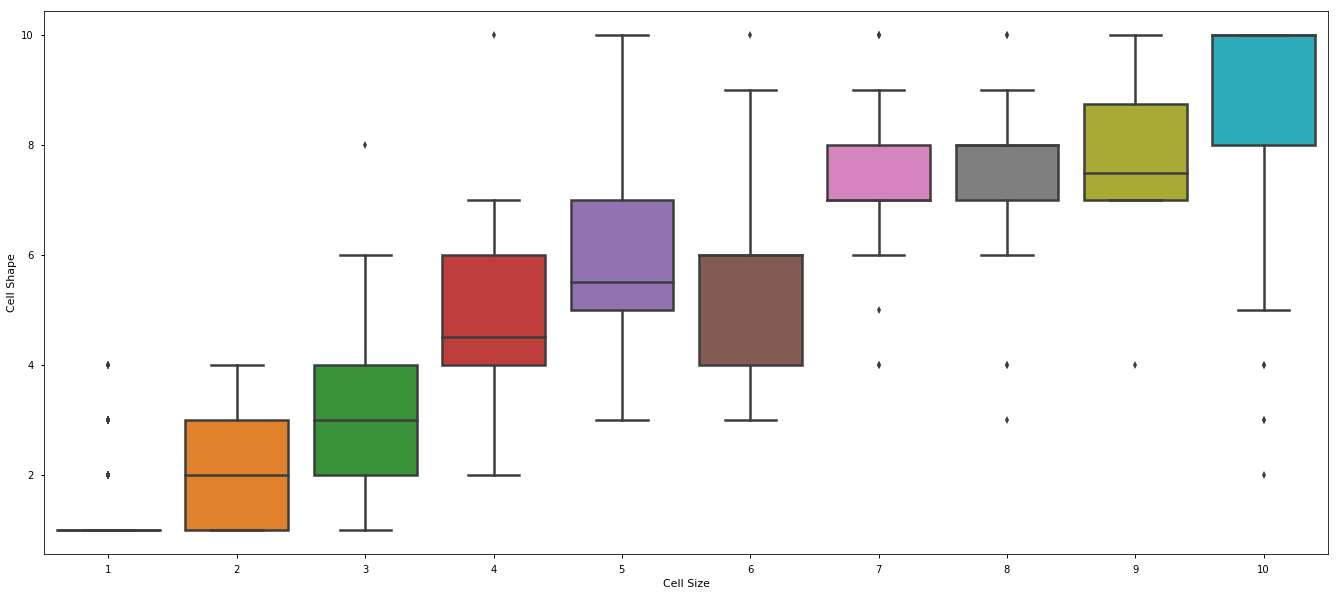

In [100]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Cell Size", y="Cell Shape", data=cancer_df)

In [102]:
columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

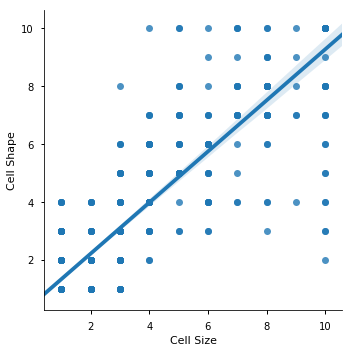

In [106]:
#Lets study the relation between Personal Loan, Income,CCAvg and CD Account as these share high correlation
g = sns.lmplot('Cell Size',"Cell Shape", cancer_df);

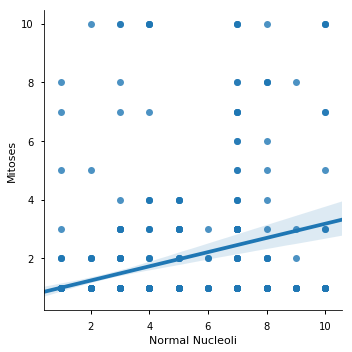

In [109]:
#Lets study the relation between Personal Loan, Income,CCAvg and CD Account as these share high correlation
g = sns.lmplot('Normal Nucleoli',"Mitoses", cancer_df);

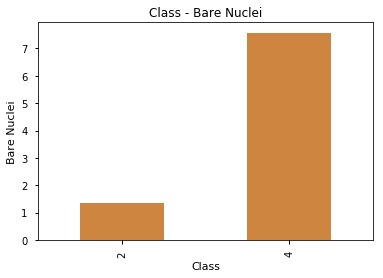

In [110]:
cancer_df.groupby('Class')['Bare Nuclei'].mean().plot(kind='bar', color = 'peru');
plt.title("Class - Bare Nuclei")
plt.ylabel('Bare Nuclei')
plt.xlabel('Class');

### Inference: Many outliers areseen in cell shape and cell size

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [111]:
columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [112]:
def detect_outlier(data_1):

    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers=[]    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [146]:
### Using Zscore  z score for each of the data point in the dataset and if the z score is greater than 3 than 
####we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.
for col in columns:
    print("Outlier data points using Zscore for ",col)
    print(detect_outlier(cancer_df[col]))
    print("")

Outlier data points using Zscore for  ID
[8233704, 13454352]

Outlier data points using Zscore for  ClumpThickness
[]

Outlier data points using Zscore for  Cell Size
[]

Outlier data points using Zscore for  Cell Shape
[]

Outlier data points using Zscore for  Marginal Adhesion
[]

Outlier data points using Zscore for  Single Epithelial Cell Size
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

Outlier data points using Zscore for  Bare Nuclei
[]

Outlier data points using Zscore for  Normal Nucleoli
[]

Outlier data points using Zscore for  Bland Chromatin
[]

Outlier data points using Zscore for  Mitoses
[7, 10, 8, 10, 7, 10, 10, 8, 7, 8, 7, 7, 10, 7, 10, 10, 10, 8, 8, 10, 10, 8, 10, 7, 8, 10, 7, 10, 10, 7, 8]

Outlier data points using Zscore for  Class
[]



#### Inference: there are outliers Single Epithelial Cell Size and Mitosis, ID can be ignored as this is anyways will be deleted. Also Mitosis is not having significant correlation with Class variable, so it is possible if the deletion of Mitosis can have issues during the classification process. So removing outliers only from column Single Epithelial Cell Size 

In [184]:
values = detect_outlier(cancer_df['Single Epithelial Cell Size'])
index=cancer_df.loc[cancer_df['Single Epithelial Cell Size'].isin(values)].index

In [185]:
cancer_df.shape

(699, 11)

In [186]:
values = detect_outlier(cancer_df['Single Epithelial Cell Size'])
cancer_df.drop(cancer_df.loc[cancer_df['Single Epithelial Cell Size'].isin(values)].index,axis=0,inplace=True)

In [187]:
cancer_df.shape

(668, 11)

In [188]:
cancer_df.shape

(668, 11)

In [189]:
values = detect_outlier(cancer_df['Mitoses'])
cancer_df.drop(cancer_df.loc[cancer_df['Mitoses'].isin(values)].index,axis=0,inplace=True)

In [190]:
cancer_df.shape

(645, 11)

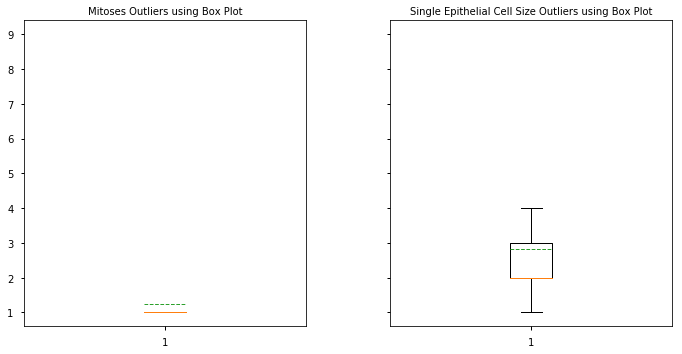

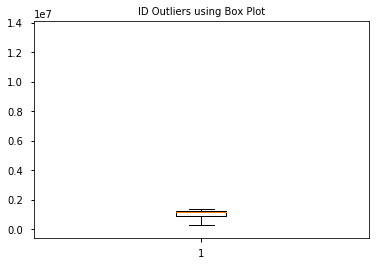

In [191]:
###Using boxplot one can identify outliers
fs=10

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(hspace=10)
axes[0].boxplot(cancer_df.Mitoses,showmeans=True,meanline=True)
axes[0].set_title('Mitoses Outliers using Box Plot', fontsize=fs)

axes[1].boxplot(cancer_df['Single Epithelial Cell Size'],showmeans=True,meanline=True)
axes[1].set_title('Single Epithelial Cell Size Outliers using Box Plot', fontsize=fs)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig, ax = plt.subplots()
ax.boxplot(cancer_df['ID'])
ax.set_title('ID Outliers using Box Plot', fontsize=fs)

plt.show()

In [193]:
# dropping column ID as this has low correlation
cancer_df.drop(columns='ID',axis=1,inplace=True)

In [194]:
cancer_df.shape

(645, 10)

In [0]:
# We could see most of the outliers are now removed.

In [204]:
cancer_df.groupby('Class').count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,PC1,PC2
Class,,,,,,,,,,,
2,455,455,455,455,455,455,455,455,455,455,455
4,190,190,190,190,190,190,190,190,190,190,190


# Q6 Create a covariance matrix for identifying Principal components

In [195]:
PredictColumn="Class"
X=pd.DataFrame()
for cols in cancer_df.columns:
    if cols!=PredictColumn:
        X[cols]=cancer_df[cols]
X.shape

(645, 9)

In [196]:
y = cancer_df[PredictColumn]
y.shape

(645,)

In [197]:
# PCA
# Step 1 - Create covariance matrix
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015528  0.61358619 0.62061426 0.47871327 0.48726221 0.57145489
  0.54314583 0.51273473 0.35929871]
 [0.61358619 1.0015528  0.89981321 0.69255084 0.73009932 0.67092322
  0.74274248 0.72566841 0.41688665]
 [0.62061426 0.89981321 1.0015528  0.67016918 0.70498089 0.68696478
  0.72874342 0.71717487 0.3775666 ]
 [0.47871327 0.69255084 0.67016918 1.0015528  0.59916173 0.68768288
  0.65094538 0.59179809 0.4008172 ]
 [0.48726221 0.73009932 0.70498089 0.59916173 1.0015528  0.58868464
  0.62237079 0.66509593 0.40294009]
 [0.57145489 0.67092322 0.68696478 0.68768288 0.58868464 1.0015528
  0.65354215 0.55492872 0.39836792]
 [0.54314583 0.74274248 0.72874342 0.65094538 0.62237079 0.65354215
  1.0015528  0.66333634 0.30756071]
 [0.51273473 0.72566841 0.71717487 0.59179809 0.66509593 0.55492872
  0.66333634 1.0015528  0.38236882]
 [0.35929871 0.41688665 0.3775666  0.4008172  0.40294009 0.39836792
  0.30756071 0.38236882 1.0015528 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [198]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.29802299  0.04448501  0.83732899 -0.30729418 -0.0044693   0.05066429
  -0.21766667 -0.25066456 -0.0292487 ]
 [-0.38072463 -0.10985584 -0.06971893 -0.14592219 -0.72806931  0.03321749
   0.12724069  0.33466165 -0.39679908]
 [-0.37635425 -0.156582   -0.01019059 -0.13950347  0.67546602  0.0457672
   0.28103821  0.35513091 -0.38836204]
 [-0.33583247 -0.00114716 -0.12982197  0.59471643  0.04904374 -0.07873739
  -0.32213489 -0.44807681 -0.45113777]
 [-0.33804742 -0.0202452  -0.35785065 -0.23884878  0.04487337  0.71976764
  -0.31507241 -0.11625147  0.25950752]
 [-0.33766657  0.00804887  0.22945199  0.54279536 -0.07504242  0.2237461
   0.53895718  0.03143153  0.43759   ]
 [-0.34695592 -0.24660513 -0.03362916  0.10532075  0.0427809  -0.45978285
  -0.48732881  0.4057471   0.43730262]
 [-0.33920752 -0.08715944 -0.29364067 -0.38282723 -0.01578674 -0.4353699
   0.35389403 -0.54112466  0.19159047]
 [-0.21924912  0.9447476  -0.0948724  -0.04246713  0.03887254 -0.13769724
  -0.034667

In order to decide which eigen vector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigen vectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigen vectors.

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 64.22258435  72.94384229  79.3195938   85.0860672   89.02299686
  92.44267668  95.8078812   98.9144171  100.        ]


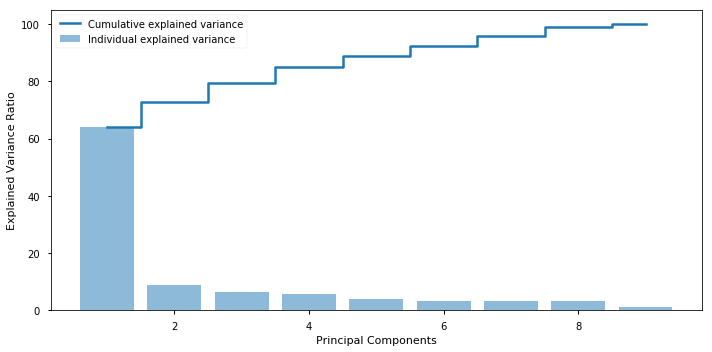

In [199]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [221]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.28426791,  2.11506872, -1.40868318, ...,  4.89289297,
         2.84094951,  3.31900156],
       [-0.04645229, -0.41631562, -0.07730449, ..., -0.43873318,
        -1.56008268, -1.62641211],
       [-0.62471743,  0.27266911, -0.06659797, ...,  1.85549866,
         0.67759137,  0.68238249],
       [ 0.25685442, -0.88359244, -0.12978107, ...,  2.21647731,
         0.11525352, -0.28856628],
       [-0.16214506,  2.45883003, -0.13506222, ..., -0.20606998,
        -1.65368208, -0.83266154],
       [-0.02342234, -0.41523616,  0.17268907, ...,  0.99910165,
         1.32819681,  1.74134585]])

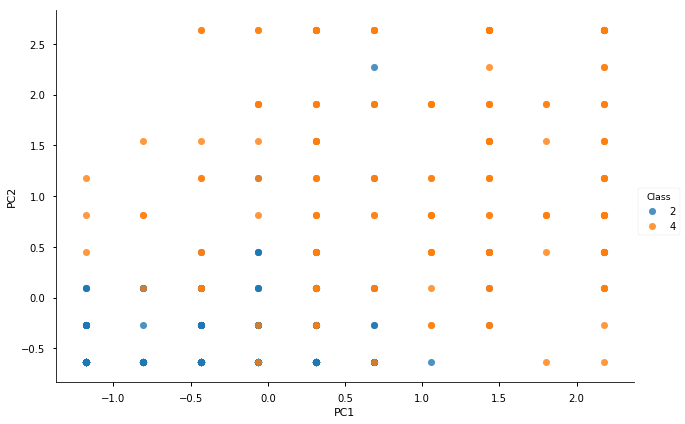

In [203]:
## Plot of PC1 & PC2
cancer_df["PC1"] = X_sd[:,0]
cancer_df["PC2"] = X_sd[:,1]mjuy6
vis = sns.lmplot(data = cancer_df[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

In [222]:
pca.components_

array([[ 0.29802299,  0.38072463,  0.37635425,  0.33583247,  0.33804742,
         0.33766657,  0.34695592,  0.33920752,  0.21924912],
       [ 0.04448501, -0.10985584, -0.156582  , -0.00114716, -0.0202452 ,
         0.00804887, -0.24660513, -0.08715944,  0.9447476 ],
       [-0.83732899,  0.06971893,  0.01019059,  0.12982197,  0.35785065,
        -0.22945199,  0.03362916,  0.29364067,  0.0948724 ],
       [ 0.30729418,  0.14592219,  0.13950347, -0.59471643,  0.23884878,
        -0.54279536, -0.10532075,  0.38282723,  0.04246713],
       [ 0.05066429,  0.03321749,  0.0457672 , -0.07873739,  0.71976764,
         0.2237461 , -0.45978285, -0.4353699 , -0.13769724],
       [-0.25066456,  0.33466165,  0.35513091, -0.44807681, -0.11625147,
         0.03143153,  0.4057471 , -0.54112466,  0.16226251]])

In [245]:
datacorr=pd.DataFrame(pca.components_, columns= list(X))

In [246]:
datacorr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.298023,0.380725,0.376354,0.335832,0.338047,0.337667,0.346956,0.339208,0.219249
1,0.044485,-0.109856,-0.156582,-0.001147,-0.020245,0.008049,-0.246605,-0.087159,0.944748
2,-0.837329,0.069719,0.010191,0.129822,0.357851,-0.229452,0.033629,0.293641,0.094872
3,0.307294,0.145922,0.139503,-0.594716,0.238849,-0.542795,-0.105321,0.382827,0.042467
4,0.050664,0.033217,0.045767,-0.078737,0.719768,0.223746,-0.459783,-0.435370,-0.137697
5,-0.250665,0.334662,0.355131,-0.448077,-0.116251,0.031432,0.405747,-0.541125,0.162263


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [209]:
###read the data in pandas FROM A CSV
jokes_df = pd.read_csv("jokes.csv")

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [211]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [216]:
Ratings = jokes_df.iloc[:200 , 1:].copy() 

In [217]:
Ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [218]:
Ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [220]:
Ratings.column=range(100)

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [223]:
Ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [224]:
Ratings.replace(99.00, 0.00,inplace=True)

In [225]:
Ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [259]:
from sklearn.preprocessing import StandardScaler
ratings_diff = pd.DataFrame(StandardScaler().fit_transform(Ratings))

In [260]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.156447,-0.121130,-0.183328,0.635932,0.534642,1.348587,0.332859,-0.862917,0.768008,1.250683,...,0.389092,1.417162,0.154845,1.425863,1.557140,1.036474,-0.233349,-0.611605,0.851903,0.403797
196,0.282432,0.978197,1.753872,0.155934,0.894403,0.762141,-1.293580,-1.574333,0.912012,0.715989,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
197,0.464796,-0.894126,-0.315613,0.067719,-0.181190,0.851135,-0.687896,0.467122,0.815182,-0.325362,...,0.289886,-0.851612,-0.528272,-0.729333,0.177949,-0.826352,-0.594963,-0.236106,0.182660,-0.025905
198,-0.117881,-0.121130,-0.053284,0.181880,1.466331,-0.301221,0.617887,-0.372143,-0.004146,-0.179172,...,0.820125,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


In [252]:
# column values are already normalised since jokes are between -10 and 10, above step is optional

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [261]:
ratings_diff.shape

(200, 100)

In [275]:
highestmean = pd.DataFrame(Ratings.mean(axis=1))

In [276]:
highestmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
0    200 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [277]:
highestmean.sort_values(by=0, ascending=False).head(10)

,0
44,5.0856
94,4.9717
159,4.8594
86,4.5111
13,4.3448
73,4.2835
109,4.1495
46,4.1096
17,3.7271
36,3.5074
